In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import pickle
from src import *
from mapping_reef_classes import get_coordinates
import glob

In [2]:
# out_folder, Ymmdd = make_datetime_folder()
# out_folder = '2019-2023-20240918'
out_folder = "2019-2023-20241029" # choose most recent folder unless a major channge is added
years = [
    "2019",
    # "2020", 
    # "2021", 
    # "2022", 
    # "2023",
    # "2024"
    ] # which years to update
all_years = ["2019", "2020", "2021", "2022", "2023", "2024"]

## Colects Lists

In [3]:
# # Collects lists
def update_collect_lists(years):
    for year in years:
        collects = list_collects(f"M:\\AUV_Collects\\{year}")
        dump_pickle(os.path.join(out_folder,f"collects{year}.txt"), collects)

# ## Load Collects Lists
collects2019 = load_pickle(os.path.join(out_folder,"collects2019.txt"))
collects2020 = load_pickle(os.path.join(out_folder,"collects2020.txt"))
collects2021 = load_pickle(os.path.join(out_folder,"collects2021.txt"))
collects2022 = load_pickle(os.path.join(out_folder,"collects2022.txt"))
collects2023 = load_pickle(os.path.join(out_folder,"collects2023.txt"))
collects2024 = load_pickle(os.path.join(out_folder,"collects2024.txt"))
all_collects = collects2019 + collects2020 + collects2021 + collects2022 + collects2023 + collects2024
dump_pickle(os.path.join(out_folder,f"all_collects.txt"), all_collects)
print(len(all_collects)) # 508 642 954

954


## Unpacked image paths

In [ ]:
# ## creating lists of unpacked image names and paths
def update_img_pth_lsts(years):
    for year in years:
        images_lst =  glob.glob(f"Z:\\__Organized_Directories_InProgress\\{year}_UnpackedCollects\\*\\*image_raw\\*.png")\
                        + glob.glob(f"Z:\\__Organized_Directories_InProgress\\{year}_UnpackedCollects\\*REMUS*\\*.tif")
        dump_pickle(os.path.join(out_folder,f"images_{year}.txt"), images_lst)

update_img_pth_lsts(years)
## Loading Images Lists
images_2019 = load_pickle(os.path.join(out_folder,"images_2019.txt"))
images_2020 = load_pickle(os.path.join(out_folder,"images_2020.txt"))
images_2021 = load_pickle(os.path.join(out_folder,"images_2021.txt"))
images_2022 = load_pickle(os.path.join(out_folder,"images_2022.txt"))
images_2023 = load_pickle(os.path.join(out_folder,"images_2023.txt"))
images_2024 = load_pickle(os.path.join(out_folder,"images_2024.txt"))
image_list = images_2019 + images_2020 + images_2021 + images_2022 + images_2023 + images_2024
print(len(image_list)) # 2035662 2041537 2300780 1678865 1600235 976615 974668 1174788 1175786 1223392 1223336

1223336


In [ ]:
## Dataframe of all unpacked images and their paths based on a list of paths
df_imgs_2019 = create_image_df_save_csv(image_list=images_2019, out_folder=out_folder, year=2019)
df_imgs_2020 = create_image_df_save_csv(image_list=images_2020, out_folder=out_folder, year=2020)
df_imgs_2021 = create_image_df_save_csv(image_list=images_2021, out_folder=out_folder, year=2021)
df_imgs_2022 = create_image_df_save_csv(image_list=images_2022, out_folder=out_folder, year=2022)
df_imgs_2023 = create_image_df_save_csv(image_list=images_2023, out_folder=out_folder, year=2023)
df_imgs_2024 = create_image_df_save_csv(image_list=images_2024, out_folder=out_folder, year=2024)
'''
2018 (0, 2)
2019 (56310, 3)
2020 (112808, 3)
2021 (279385, 3)
2022 (271183, 3)
2023 (302562, 3)
2024 (201088, 3)
Total imgs:  1223336
'''
print("Total imgs: ", len(df_imgs_2019)+len(df_imgs_2020)+len(df_imgs_2021)+len(df_imgs_2022)+len(df_imgs_2023) + len(df_imgs_2024))


2019 (56310, 3)
2020 (112808, 3)
2021 (279385, 3)
2022 (271183, 3)
2023 (302562, 3)
2024 (201088, 3)
Total imgs:  1223336


## Metadata

### Reading and combining All metadata by year and cleaning

In [ ]:
def update_headers_combined(years): #saves a csv header_{year}_combined
    headers = pd.Series(glob.glob(r"Z:\CollectMetadata\*\*Primary_Image_Metadata*.csv"))
    for year in years:
        header_pth = list(headers[headers.str.contains(year+r"\d{4}_")])
        header_comb = combine_headers(header_pth)
        header_comb = header_comb.drop_duplicates(subset=['Time_s', 'filename', 'collect_id'])
        header_comb.to_csv(os.path.join(out_folder, f"header_{year}_combined.csv"))
        header_comb[["collect_id", "Latitude", "Longitude"]].groupby(by="collect_id").median().to_csv(os.path.join(out_folder,f"median_latlon_{year}.csv"))
update_headers_combined(years)
header_2019 = pd.read_csv(os.path.join(out_folder, "header_2019_combined.csv"), index_col=0, low_memory=False)
header_2020 = pd.read_csv(os.path.join(out_folder, "header_2020_combined.csv"), index_col=0, low_memory=False)
header_2021 = pd.read_csv(os.path.join(out_folder, "header_2021_combined.csv"), index_col=0, low_memory=False)
header_2022 = pd.read_csv(os.path.join(out_folder, "header_2022_combined.csv"), index_col=0, low_memory=False)
header_2023 = pd.read_csv(os.path.join(out_folder, "header_2023_combined.csv"), index_col=0, low_memory=False)
header_2024 = pd.read_csv(os.path.join(out_folder, "header_2024_combined.csv"), index_col=0, low_memory=False)
all_headers = pd.concat([header_2019, header_2020, header_2021, header_2022, header_2023, header_2024])
all_headers.to_pickle(os.path.join(out_folder,"all_headers.pickle"))

''' 
2019 (168379, 149)
2020 (220032, 127)
2021 (407575, 149)
2022 (437992, 151)
2023 (421447, 149)
2024 (346138, 149)
'''
print("2019", header_2019.shape)
print("2020", header_2020.shape)
print("2021", header_2021.shape)
print("2022", header_2022.shape)
print("2023", header_2023.shape)
print("2024", header_2024.shape)

2019 (168379, 149)
2020 (220032, 127)
2021 (407575, 149)
2022 (437992, 151)
2023 (421447, 149)
2024 (346138, 149)


### Unpacked Images Metadata

In [7]:
'''
2019 (4992, 154)
2020 (112808, 132)
2021 (276134, 153)
2022 (240196, 154)
2023 (300456, 153)
2024 (195504, 154)
'''

def update_unpacked_imgs_db(years):
    for year in years:
        if year == "2019":
            create_unpacked_images_metatada_df(header_2019, df_imgs_2019, ext = ".png", year = 2019, old_filenames=True) # 2019 (4992, 154)
        if year == "2020":
            create_unpacked_images_metatada_df(header_2020, df_imgs_2020, ext = ".png", year = 2020, old_filenames=True) # 2020 (112808, 132)
        if year == "2021":
            create_unpacked_images_metatada_df(header_2021, df_imgs_2021, ext = ".png", year = 2021)
        if year == "2022":
            create_unpacked_images_metatada_df(header_2022, df_imgs_2022, ext = ".png", year = 2022)
        if year == "2023":
            create_unpacked_images_metatada_df(header_2023, df_imgs_2023, ext = ".png", year = 2023)
        if year == "2024":
            create_unpacked_images_metatada_df(header_2024, df_imgs_2024, ext = ".png", year = 2024)
update_unpacked_imgs_db(years)
df_unp_2019 = pd.read_csv(r"all_unpacked_images_metadata_2019.csv", index_col=0, low_memory=False)
df_unp_2020 = pd.read_csv(r"all_unpacked_images_metadata_2020.csv", index_col=0, low_memory=False)
df_unp_2021 = pd.read_csv(r"all_unpacked_images_metadata_2021.csv", index_col=0, low_memory=False)
df_unp_2022 = pd.read_csv(r"all_unpacked_images_metadata_2022.csv", index_col=0, low_memory=False)
df_unp_2023 = pd.read_csv(r"all_unpacked_images_metadata_2023.csv", index_col=0, low_memory=False)
df_unp_2024 = pd.read_csv(r"all_unpacked_images_metadata_2024.csv", index_col=0, low_memory=False)

2019 (4992, 155)


### Finished with creating metatadata

In [8]:
# header_times = pd.concat([header_2019.Time_s, header_2020.Time_s, header_2021.Time_s, header_2022.Time_s, header_2023.Time_s, header_2024.Time_s])
# plot_epoch_time(df1=header_times, df2=pd.DataFrame(),title=None, lbl1=None, lbl2=None)

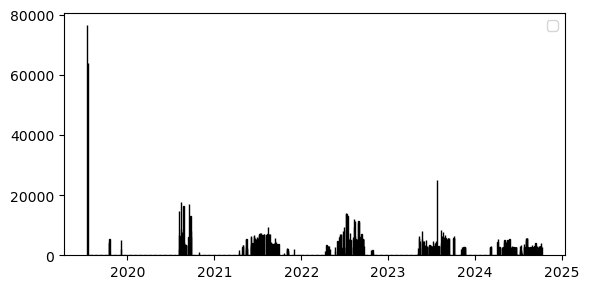

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


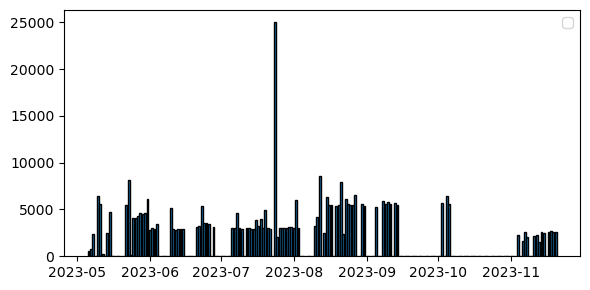

In [ ]:
# plot_epoch_time(df1=header_2023.Time_s, df2=pd.DataFrame(),title=None, lbl1=None, lbl2=None)

In [16]:
header_2023[header_2023.collect_id.str.contains("20230724")].groupby(by="collect_id").count().Time_s.sort_values(ascending=False)

collect_id
20230724_002_Iver3098_ABS2    8578
20230724_003_Iver3098_ABS2    8119
20230724_004_Iver3098_ABS2    7405
20230724_001_Iver3098_ABS2     964
Name: Time_s, dtype: int64